# Inroduction to NLP

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

**Reading and Exploring Dataset**

**Reading in text data & why do we need to clean the text?**
While reading data, we get data in the structured or unstructured format. A structured format has a well-defined pattern whereas unstructured data has no proper structure. 

As we can see from above when we read semi-structured data it is hard to interpret so we use pandas to easily understand our data.

In [ ]:
data  = pd.read_csv("SMSSpamCollection.tsv", sep="\t", names=["label", "body_text"], header=None)
data.head()

,label,body_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Pre-Processing

Cleaning up the text data is necessary to highlight attributes that we’re going to want our machine learning system to pick up on. Cleaning (or pre-processing) the data typically consists of a number of steps:

1. **Remove punctuation**
Punctuation can provide grammatical context to a sentence which supports our understanding. But for our vectorizer which counts the number of words and not the context, it does not add value, so we remove all special characters. eg: How are you?->How are you

## 1. Removing Punctuations

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# Function to remove punctuations.
def remove_punc(text):
    nonP_text = "".join([char for char in text if char not in string.punctuation])
    return nonP_text

data["body_text_clean"] = data["body_text"].apply(lambda x: remove_punc(x))

data.head()

,label,body_text,body_text_clean
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...


In body_text_clean, we can see that all punctuations like I’ve-> I’ve are omitted.

## 2. Tokenization

Tokenizing separates text into units such as sentences or words. It gives structure to previously unstructured text. eg: Plata o Plomo-> ‘Plata’,’o’,’Plomo’.

In [ ]:
import re

#function to apply tokenization
def tokenize(text):
    tokens = re.split("\W+", text)# W+ means all capital, small alphabets and integers 0-9
    return tokens

data["body_text_tokenized"] = data["body_text_clean"].apply(lambda x: tokenize(x))

data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t..."
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l..."


In body_text_tokenized, we can see that all words are generated as tokens.

**Remove stopwords**
Stopwords are common words that will likely appear in any text. They don’t tell us much about our data so we remove them. eg: silver or lead is fine for me-> silver, lead, fine.

## 3. Remove Stopwords

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words("english")

def remove_stopwords(token):
    text = [word for word in token if word not in stopwords]# to remove all stopwords
    return text

data["body_text_nonstop"] = data["body_text_tokenized"].apply(lambda x: remove_stopwords(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around..."


Preprocessing Data: Stemming
Stemming helps reduce a word to its stem form. It often makes sense to treat related words in the same way. It removes suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. It reduces the corpus of words but often the actual words get neglected. eg: Entitling,Entitled->Entitl Note: Some search engines treat words with the same stem as synonyms.

## 3. Stemming

In [ ]:
ps = nltk.PorterStemmer()

def stemming(t_text):
    text = [ps.stem(word) for word in t_text]
    return text

data["body_text_stemmed"] = data["body_text_nonstop"].apply(lambda x: stemming(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ..."


## 4. Lemmatizer

**Preprocessing Data: Lemmatizing**
Lemmatizing derives the canonical form (‘lemma’) of a word. i.e the root form. It is better than stemming as it uses a dictionary-based approach i.e a morphological analysis to the root word.eg: Entitling, Entitled->Entitle In Short, Stemming is typically faster as it simply chops off the end of the word, without understanding the context of the word. Lemmatizing is slower and more accurate as it takes an informed analysis with the context of the word in mind.

In [ ]:
wn = nltk.WordNetLemmatizer()

def lemmatizer(t_text):
    text = [wn.lemmatize(word) for word in t_text]
    return text

data["body_text_lemmatized"] = data["body_text_stemmed"].apply(lambda x: lemmatizer(x))
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nonstop,body_text_stemmed,body_text_lemmatized
0,ham,"Go until jurong point, crazy.. Available only ...",Go until jurong point crazy Available only in ...,"[Go, until, jurong, point, crazy, Available, o...","[Go, jurong, point, crazy, Available, bugis, n...","[Go, jurong, point, crazi, avail, bugi, n, gre...","[Go, jurong, point, crazi, avail, bugi, n, gre..."
1,ham,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni,"[Ok, lar, Joking, wif, u, oni]","[Ok, lar, Joking, wif, u, oni]","[Ok, lar, joke, wif, u, oni]","[Ok, lar, joke, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[Free, entry, 2, wkly, comp, win, FA, Cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin...","[free, entri, 2, wkli, comp, win, FA, cup, fin..."
3,ham,U dun say so early hor... U c already then say...,U dun say so early hor U c already then say,"[U, dun, say, so, early, hor, U, c, already, t...","[U, dun, say, early, hor, U, c, already, say]","[U, dun, say, earli, hor, U, c, alreadi, say]","[U, dun, say, earli, hor, U, c, alreadi, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",Nah I dont think he goes to usf he lives aroun...,"[Nah, I, dont, think, he, goes, to, usf, he, l...","[Nah, I, dont, think, goes, usf, lives, around...","[nah, I, dont, think, goe, usf, live, around, ...","[nah, I, dont, think, goe, usf, live, around, ..."


## Saving the cleaned Data

In [ ]:
# We save the file as CSV 
# CSV(Comma-separated-value), It is easier to read compared to tsv(Tab-separated-value) and can be opened on Excel.
data.to_csv("SMSSpamCollection_cleaned.csv", sep=',')

## Vectorizing Data: Bag-Of-Words

**Vectorizing Data**
Vectorizing is the process of encoding text as integers i.e. numeric form to create feature vectors so that machine learning algorithms can understand our data.

Vectorizing Data: Bag-Of-Words
Bag of Words (BoW) or CountVectorizer describes the presence of words within the text data. It gives a result of 1 if present in the sentence and 0 if not present. It, therefore, creates a bag of words with a document-matrix count in each text document.

In [ ]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth', 100) # To extend column width

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']


In [ ]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

## Apply Count Vectorizer
Encoding Text as integer i.e. numeric form to create feature vectors so that we can apply ML algos on it.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

count = CountVectorizer(analyzer=clean_text)
x_count = count.fit_transform(data["body_text"])

x_count.shape
count.get_feature_names()

['',
 '0',
 '008704050406',
 '0089mi',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '020603',
 '0207',
 '02070836089',
 '02072069400',
 '02073162414',
 '02085076972',
 '020903',
 '021',
 '050703',
 '0578',
 '06',
 '060505',
 '061104',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '071104',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '0784987',
 '0789xxxxxxx',
 '0794674629107880867867',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '0

In [ ]:
x_count_df = pd.DataFrame(x_count.toarray(), columns=count.get_feature_names())
x_count_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,07801543489,07808,...,yourjob,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,z,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Vectorize Raw Data: 
## 1. N Grams

BOW is applied on the body_text, so the count of each word is stored in the document matrix. (Check the repo).

Vectorizing Data: N-Grams
N-grams are simply all combinations of adjacent words or letters of length n that we can find in our source text. Ngrams with n=1 are called unigrams. Similarly, bigrams (n=2), trigrams (n=3) and so on can also be used.

Unigrams usually don’t contain much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the letter or word is likely to follow the given word. The longer the n-gram (higher n), the more context you have to work with.

## Apply CountVectorizer(N-Grams)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2),analyzer=clean_text) # It applies only bigram vectorizer
X_counts = ngram_vect.fit_transform(data['body_text'])
print(X_counts.shape)
print(ngram_vect.get_feature_names())

(5571, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [ ]:
X_counts_df = pd.DataFrame(X_counts.toarray(), columns=ngram_vect.get_feature_names())
X_counts_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,07801543489,07808,...,yourjob,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,z,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 2. TF-IDF
## Apply TFIDFvectorizer

It computes “relative frequency” that a word appears in a document compared to its frequency across all documents. It is more useful than “term frequency” for identifying “important” words in each document (high frequency in that document, low frequency in other documents). Note: Used for search engine scoring, text summarization, document clustering. Check my previous post — In the TF-IDF Section, I have elaborated on the working of TF-IDF.

TF-IDF is applied on the body_text, so the relative count of each word in the sentences is stored in the document matrix. (Check the repo). Note: Vectorizers outputs sparse matrices. Sparse Matrix is a matrix in which most entries are 0. In the interest of efficient storage, a sparse matrix will be stored by only storing the locations of the non-zero elements.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
print(X_tfidf.shape)
print(tfidf_vect.get_feature_names())

(5571, 8107)
['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p'

In [ ]:
X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vect.get_feature_names())
X_tfidf_df.head(10)

,,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,02070836089,02072069400,02073162414,02085076972,020903,021,050703,0578,06,060505,061104,07008009200,07046744435,07090201529,07090298926,07099833605,071104,07123456789,0721072,07732584351,07734396839,07742676969,07753741225,0776xxxxxxx,07786200117,077xxx,078,07801543489,07808,...,yourjob,youso,youthat,youto,youuuuu,youv,youwanna,youwhen,yovil,yowif,yoyyooo,yr,ystrdayic,yummi,yummmm,yun,yunni,yuo,yuou,yup,yupz,ywhere,z,zac,zaher,zealand,zebra,zed,zero,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(X_tfidf_df.loc[(X_tfidf_df!=0).any(axis=1)])

             0  008704050406  0089mi  0121  ...  zyada    é         ü  üll  〨ud
0     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
1     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
2     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
3     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
4     0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
...   ...  ...           ...     ...   ...  ...    ...  ...       ...  ...  ...
5566  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
5567  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.335223  0.0  0.0
5568  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
5569  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0
5570  0.0  0.0           0.0     0.0   0.0  ...    0.0  0.0  0.000000  0.0  0.0

[5570 rows x 8107 columns]


## Feature Engineering: Feature Creation

Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. It is like an art as it requires domain knowledge and it can tough to create features, but it can be fruitful for ML algorithm to predict results as they can be related to the prediction.

In [ ]:
import pandas as pd

data = pd.read_csv("SMSSpamCollection.tsv", sep='\t')
data.columns = ['label', 'body_text']

### Create feature for text message length and % of punctuation in text 

In [ ]:
import string

# Function to calculate length of message excluding space
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

data.head()

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

data.head()

,label,body_text,body_len,punct%
0,ham,Ok lar... Joking wif u oni...,24,25.0
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
2,ham,U dun say so early hor... U c already then say...,39,15.4
3,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
4,spam,FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for ...,116,6.9


body_len shows the length of words excluding whitespaces in a message body. punct% shows the percentage of punctuation marks in a message body.

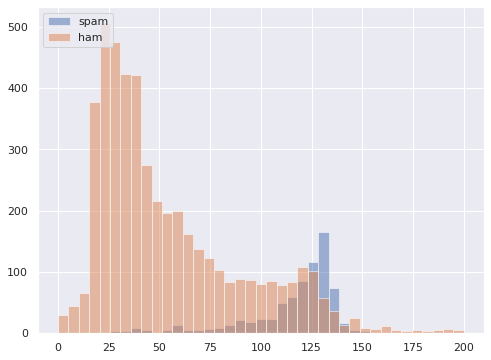

In [ ]:
import seaborn as sns
#Setting the size and grid for plotting
sns.set(rc= {"figure.figsize": (8, 6)})

bins = np.linspace(0, 200, 40)

plt.hist(data[data['label']=='spam']['body_len'], bins, alpha=0.5,  label='spam')
plt.hist(data[data['label']=='ham']['body_len'], bins, alpha=0.5,  label='ham')
plt.legend(loc='upper left')
plt.show()

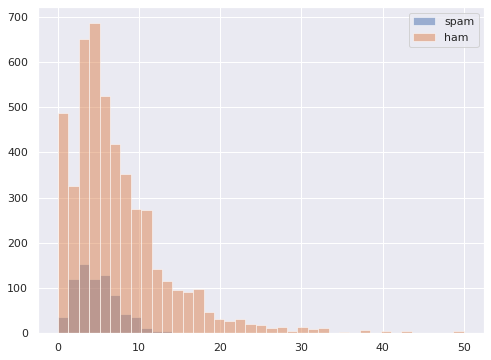

In [ ]:
bins = np.linspace(0, 50, 40)

plt.hist(data[data['label']=='spam']['punct%'], bins, alpha=0.5, label='spam')
plt.hist(data[data['label']=='ham']['punct%'], bins, alpha=0.5, label='ham')
plt.legend(loc='upper right')
plt.show()

### Split into train/test

In [ ]:
from sklearn.model_selection import train_test_split

X=data[['body_text', 'body_len', 'punct%']]
y=data['label']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

### Vectorize text

In [ ]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_train.toarray())], axis=1)
X_test_vect = pd.concat([X_test[['body_len', 'punct%']].reset_index(drop=True), 
           pd.DataFrame(tfidf_test.toarray())], axis=1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,...,7181,7182,7183,7184,7185,7186,7187,7188,7189,7190,7191,7192,7193,7194,7195,7196,7197,7198,7199,7200,7201,7202,7203,7204,7205,7206,7207,7208,7209,7210,7211,7212,7213,7214,7215,7216,7217,7218,7219,7220
0,31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,29,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,5.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,61,3.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Final evaluation of models

In [ ]:
! pip install yellowbrick

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import accuracy_score as acs
from sklearn.metrics import confusion_matrix, classification_report
from yellowbrick.classifier import ClassificationReport

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Precision: 1.0 / Recall: 0.85 / F1-Score: 0.919 / Accuracy: 97.848%


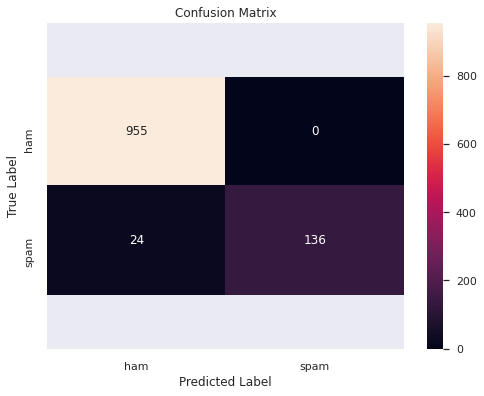

In [ ]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

rf_model = rf.fit(X_train_vect, y_train)

y_pred = rf_model.predict(X_test_vect)

precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print('Precision: {} / Recall: {} / F1-Score: {} / Accuracy: {}%'.format(
    round(precision, 3), round(recall, 3), round(fscore,3), round(acs(y_test,y_pred)*100, 3)))

sns.set(rc= {"figure.figsize": (8, 6)})

cm = confusion_matrix(y_test, y_pred)
class_label = ["ham", "spam"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
ax = sns.heatmap(df_cm, annot=True, fmt='d')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Classification Reports

## 1. Using Heatmap

(5.5, -0.5)

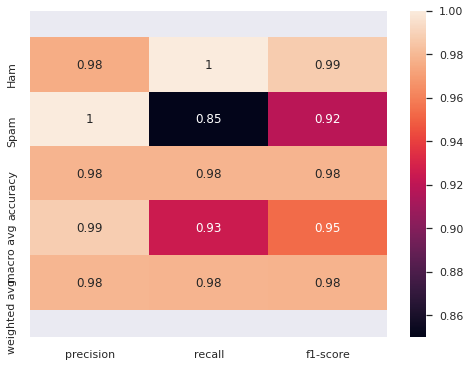

In [ ]:
true = np.random.randint(0, 10, size=100)
pred = np.random.randint(0, 10, size=100)
target_names = ["Ham", "Spam"]

clf_report = classification_report(y_test,
                                   y_pred,
                                   target_names=target_names,
                                   output_dict=True)

ax = sns.heatmap(pd.DataFrame(clf_report).iloc[:-1, :].T, annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       955
        spam       1.00      0.85      0.92       160

    accuracy                           0.98      1115
   macro avg       0.99      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115



## 2. Using Yellowbrick Visualization

0.8923766816143498

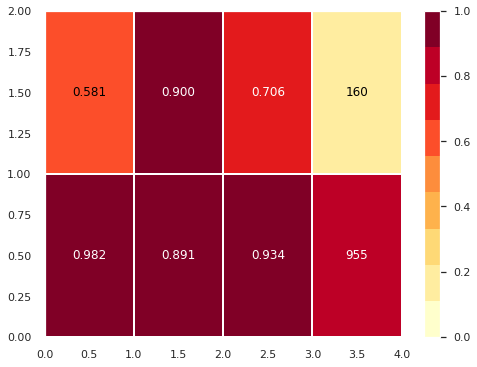

In [ ]:
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport

# Instantiate the classification model and visualizer
classes = ["Ham", "Spam"]

bayes = GaussianNB()
visualizer = ClassificationReport(bayes, classes=classes, support=True)

visualizer.fit(X_train_vect, y_train)  # Fit the visualizer and the model
visualizer.score(X_test_vect, y_test)  # Evaluate the model on the test data
